In [3]:
#Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = ""
CHAPTER_ID = "Regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=100):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

About this data

    url: the url which fetches the data
    id: the id of transaction
    Lng: and Lat coordinates, using the BD09 protocol.
    Cid: community id
    tradeTime: the time of transaction
    DOM: active days on market.Know more in https://en.wikipedia.org/wiki/Days_on_market
    followers: the number of people follow the transaction.
    totalPrice: the total price
    price: the average price by square
    square: the square of house
    livingRoom: the number of living room
    drawingRoom: the number of drawing room
    kitchen: the number of kitchen
    bathroom the number of bathroom
    floor: the height of the house.
    buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).
    constructionTime: the time of construction
    renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )
    buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).
    ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.
    elevator have ( 1 ) or not have elevator( 0 )
    fiveYearsProperty: if the owner have the property for less than 5 years,


## Load the Dataset

In [4]:
Raw_data = pd.read_csv("new.csv", encoding='iso-8859-1', low_memory=False)

In [5]:
Raw_data.head(-1)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318845,https://bj.lianjia.com/chengjiao/BJYZ92303482....,BJYZ92303482,116.546899,39.755236,1111027377053,2016-06-09,1.0,8,355.5,26491,...,3.0,2009,4,6,0.500,1.0,1.0,0.0,3,36545.0
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0


In [6]:
Raw_data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [7]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

## Pre-processing the dataset

### Deleting and cleaning the data. 

In [8]:
# delete non numerical not important data. 
Raw_data.drop(['url', "id",'tradeTime'], axis=1, inplace=True)

In [9]:
#Raw_data["totalPrice"] = Raw_data["price"]*Raw_data["square"]

In [10]:
# the floor features have unidentified characters. those should be cleaned. 
Raw_data.floor

0         ¸ß 26
1         ¸ß 22
2          ÖÐ 4
3         µ× 21
4          ÖÐ 6
          ...  
318846     ÖÐ 5
318847    ÖÐ 24
318848     ÖÐ 7
318849     ÖÐ 5
318850    ÖÐ 17
Name: floor, Length: 318851, dtype: object

In [11]:
# force all my dataset to have numerical values and change onbjects to numerical. 
Raw_data_num = Raw_data.astype(float, errors='ignore')

In [12]:
Raw_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   Cid                  318851 non-null  float64
 3   DOM                  160874 non-null  float64
 4   followers            318851 non-null  float64
 5   totalPrice           318851 non-null  float64
 6   price                318851 non-null  float64
 7   square               318851 non-null  float64
 8   livingRoom           318851 non-null  object 
 9   drawingRoom          318851 non-null  object 
 10  kitchen              318851 non-null  float64
 11  bathRoom             318851 non-null  object 
 12  floor                318851 non-null  object 
 13  buildingType         316830 non-null  float64
 14  constructionTime     318851 non-null  object 
 15  renovationConditi

In [13]:
# extracting the numrical data and deleteing the unidentified characters. 
Raw_data_num['floor'] = Raw_data_num['floor'].str.extract('(\d+)', expand=False)

In [14]:
# indiviually changing objects to numerical values. 
Raw_data_num['livingRoom'] = pd.to_numeric(Raw_data_num['livingRoom'], errors="coerce")
Raw_data_num['drawingRoom'] = pd.to_numeric(Raw_data_num['drawingRoom'], errors="coerce")
Raw_data_num['bathRoom'] = pd.to_numeric(Raw_data_num['bathRoom'], errors="coerce")
Raw_data_num['constructionTime'] = pd.to_numeric(Raw_data_num['constructionTime'], errors="coerce")
Raw_data_num['floor'] = pd.to_numeric(Raw_data_num['floor'], errors="coerce")

In [15]:
# checking the resuls. 
Raw_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   Cid                  318851 non-null  float64
 3   DOM                  160874 non-null  float64
 4   followers            318851 non-null  float64
 5   totalPrice           318851 non-null  float64
 6   price                318851 non-null  float64
 7   square               318851 non-null  float64
 8   livingRoom           318819 non-null  float64
 9   drawingRoom          318819 non-null  float64
 10  kitchen              318851 non-null  float64
 11  bathRoom             318849 non-null  float64
 12  floor                318819 non-null  float64
 13  buildingType         316830 non-null  float64
 14  constructionTime     299568 non-null  float64
 15  renovationConditi

In [16]:
Raw_data.head()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,1111027376244,1464.0,106,415.0,31680,131.00,2,1,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,1111027381879,903.0,126,575.0,43436,132.38,2,2,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,1111040862969,1271.0,48,1030.0,52021,198.00,3,2,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,1111043185817,965.0,138,297.5,22202,134.00,3,1,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,1111027381174,927.0,286,392.0,48396,81.00,2,1,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54ab7b8b10>,
      dtype=object)

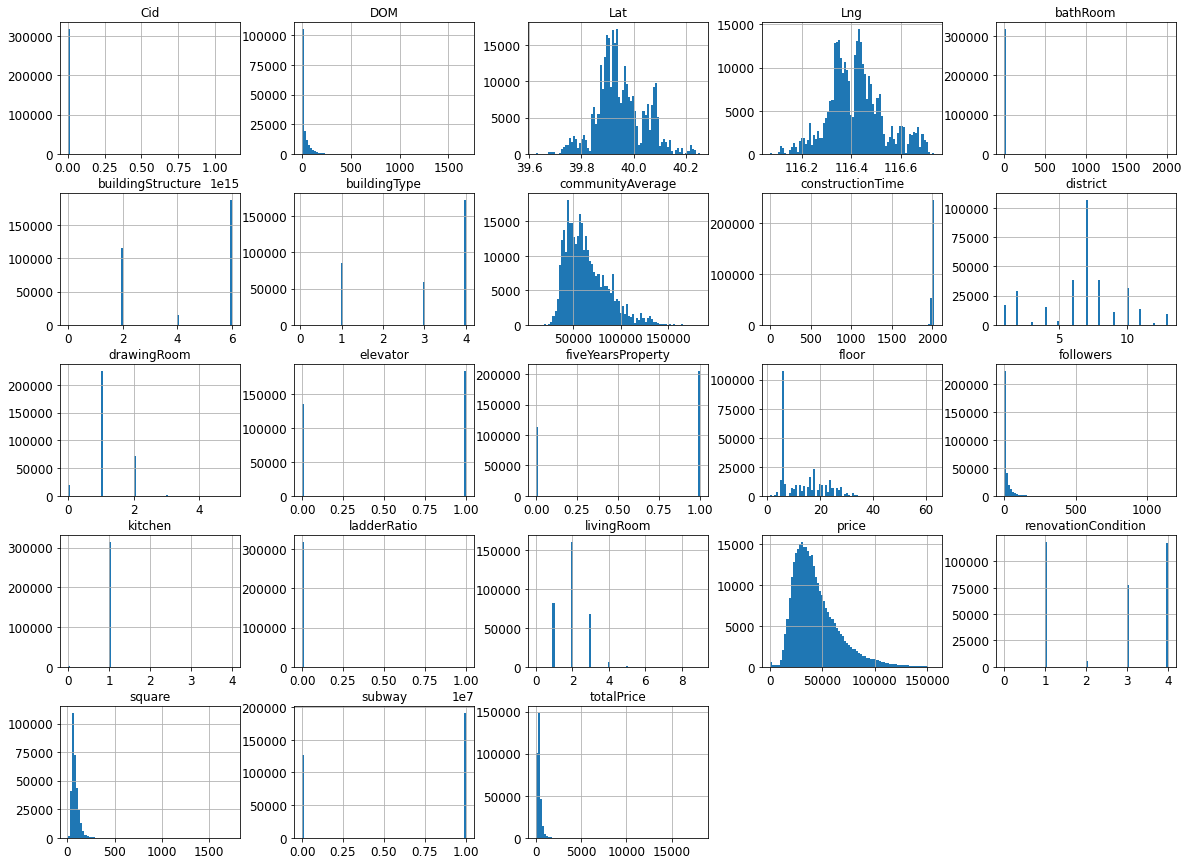

In [17]:
# checkin the data distrubtion of my features. 
# some dimentinality reduction methods will not accept none normally distrubuted data. 
Raw_data_num.hist(bins=80,figsize=(20,15))

In [18]:
# checking the correlation of the feature with our target. 
corr_matrix = Raw_data_num.corr()
corr_matrix['totalPrice'].sort_values(ascending=False)

totalPrice             1.000000
price                  0.622658
square                 0.575843
livingRoom             0.434312
communityAverage       0.421428
drawingRoom            0.322706
renovationCondition    0.250890
DOM                    0.225404
elevator               0.192345
buildingStructure      0.188114
followers              0.152681
floor                  0.148811
subway                 0.113183
kitchen                0.081393
constructionTime       0.056974
Lat                    0.019969
district               0.010315
bathRoom               0.000473
Cid                    0.000071
ladderRatio           -0.001063
fiveYearsProperty     -0.003225
buildingType          -0.060346
Lng                   -0.069831
Name: totalPrice, dtype: float64

### Creating new feature from longitude and latitude

In [19]:
import hdbscan

ModuleNotFoundError: No module named 'hdbscan'

In [ ]:
X = Raw_data_num[['Lng','Lat']].values

In [ ]:
rads = np.radians(X)

In [ ]:
# the idea is to create new features in order to group house according to thier location. 
# hence the location of the house can provide insight into the price of the house. 
# by the utilization of HDBScan clusterting algorithm.  
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, metric='haversine',core_dist_n_jobs=12
                            ,cluster_selection_epsilon=0.0005,min_samples=10, cluster_selection_method="leaf")
predictions = clusterer.fit_predict(rads)

In [ ]:
clustered = pd.concat([Raw_data_num.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)

In [ ]:
clustered.drop(["index"], axis=1, inplace=True)

In [ ]:
# checking the distrubution of  resilted clusters
clustered.Cluster.hist(bins=200)

In [ ]:
corr_matrix_clustered = clustered.corr()
corr_matrix_clustered['totalPrice'].sort_values(ascending=False)

In [ ]:
# seeing the resulted clusters on the map. 
clustered.plot(kind="scatter", x="Lng", y="Lat", alpha=0.3,
    s=0.1, figsize=(10,7),
    c=clustered['Cluster'], 
    cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("Clusters")
plt.show()

In [ ]:
clustered.hist(bins=200,figsize=(20,15))

In [ ]:
clustered.info()

In [ ]:
# droping features with low correlation. 
clustered.drop(["Lng","Lat","Cid","price","ladderRatio","fiveYearsProperty"], axis=1, inplace=True)

In [ ]:
# adding missing values by adding medians
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(clustered)
X_imputed = imputer.transform(clustered)

In [ ]:
# making a new final dataframe. 
Data_processing1 = pd.DataFrame(X_imputed, columns=clustered.columns,
                          index=clustered.index)

In [ ]:
Data_processing1.info()

## Split the dataset into Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split

# X_data as features 
X_data = Data_processing1.drop(columns="totalPrice")
# Y_data as target label
Y_data = Data_processing1['totalPrice']

# split data for train and test set 80:20 spilt 
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20, random_state=42)

In [ ]:
baseline = np.mean(Y_data)
#Get an array with baseline with the size of the testing dataset 
y_baseline = np.repeat(baseline, len(y_test))
# import the metric 
from sklearn.metrics import mean_squared_error
#y_test are the true values of y 
naive_RSME = mean_squared_error(y_test, y_baseline)
naive_RSME=np.sqrt(naive_RSME)
naive_RSME

In [ ]:
from sklearn.dummy import DummyRegressor
# Create the dummy regessor.
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
DummyRegressor()
# baseline error for the dummy regressor.
regression_RSME = mean_squared_error(y_test, dummy_regr.predict(X_test))
regression_baseline = np.sqrt(regression_RSME)
regression_baseline

In [ ]:
# function to print results according to classifer. 

def results(clf, X_train, X_test, y_train, y_test):
    from sklearn.metrics import mean_squared_error
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    RMSE_training = np.sqrt(mean_squared_error(y_train, train_predict))
    RMSE_test=np.sqrt(mean_squared_error(y_test, test_predict))
    print('The naive RMSE baseline is ', naive_RSME)
    print('The regression_baseline is ', regression_baseline)
    print('The model performance in training is ', RMSE_training)
    print('The model performance in testing is ', RMSE_test)

## Data Modelling

### Model 1 Selection 
Stochastic gradient descent regressor 

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# creating a simple pipline as an input to gridsearch. 
SGD_pipe = Pipeline([("scaler", StandardScaler()),
                       ("sgd_reg", SGDRegressor(random_state=42,learning_rate='adaptive',
                                               early_stopping=True,validation_fraction=0.2))])


### Model 1 Training and Hyperparameter Tuning 

In [37]:
from sklearn.model_selection import GridSearchCV


# Creating the parameters search set
SGD_param = dict(sgd_reg__penalty = ['l2', 'l1', 'elasticnet'],
             sgd_reg__alpha = np.logspace(-7, -1, 20),
             sgd_reg__eta0 = np.logspace(0.1, 0.7, 20))


# initialize GirdSearch
Search_SGD = GridSearchCV(SGD_pipe, SGD_param, scoring='neg_root_mean_squared_error',
                          verbose=10, n_jobs=-2)
# train and find the best parameters
Search_SGD.fit(X_train,y_train)
# assign the best predictor with the resulted parameter search
SGD_predict = Search_SGD.best_estimator_
# checking the results of the search
Search_SGD.best_params_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-2)]: Done  39 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-2)]: Done  50 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-2)]: Done  63 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-2)]: Done  76 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done  91 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-2)]: Done 106 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 123 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-2)]: Done 159 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-2)]: Done 199 tasks      | elapsed:  

{'sgd_reg__alpha': 3.7926901907322535e-06,
 'sgd_reg__eta0': 1.9474830399087562,
 'sgd_reg__penalty': 'l2'}

In [47]:
def plot_results(clf, n, Image_name):
    x = [i+1 for i in range(n)]
    y_label = y_test.iloc[:n]
    y_predict = clf.predict(X_test.iloc[:n])
    plt.plot(x, y_label, c='red', label='True Price')
    plt.plot(x, y_predict, c='blue', label='Predicted Price')
    plt.xlabel("Data Points", fontsize=11)
    plt.ylabel("House Price", rotation=90, fontsize=11)
    plt.legend()
    save_fig(Image_name)
    plt.show()

### Candidate Model 1 Evaluation

In [39]:
results(SGD_predict, X_train, X_test, y_train, y_test )

The naive RMSE baseline is  231.7124484086676
The regression_baseline is  231.7129078038355
The model performance in training is  129.42542229687336
The model performance in testing is  132.37891372399372


Saving figure SGD_Results


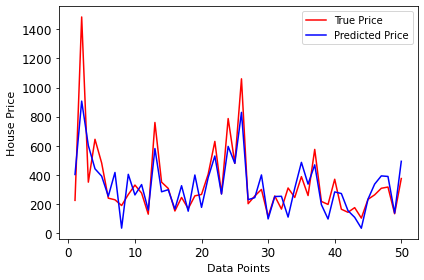

In [55]:
plot_results(SGD_predict, 50, 'SGD_Results')

### Model 2 Selection 
Passive Aggressive Regressor

In [2]:
from sklearn.linear_model import PassiveAggressiveRegressor



PAR_pipe = Pipeline([("scaler", StandardScaler()),
                     ("pca", PCA()),
                     ("PAR", PassiveAggressiveRegressor(early_stopping= True,
                                                       validation_fraction=0.2,
                                                       ))])


NameError: name 'Pipeline' is not defined

### Model 2 Training and Hyperparameter Tuning 

In [42]:
# Creating the parameters search set
param_PAR = dict(PAR__C = np.logspace(-10, -5 , 20),
                 PAR__max_iter = [1000,2000],
                PAR__loss = ["epsilon_insensitive", "squared_epsilon_insensitive"],
                pca__n_components= [1,2,3,4,5,6,7])

# initialize GirdSearch
Search_PAR = GridSearchCV(PAR_pipe, param_PAR, scoring='neg_root_mean_squared_error',
                          verbose=10, n_jobs=-2)


# train and find the best parameters
Search_PAR.fit(X_train,y_train)

# assign the best predictor with the resulted parameter search
PAR_predict = Search_PAR.best_estimator_

# checking the results of the search
Search_PAR.best_params_

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-2)]: Done  39 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-2)]: Done  50 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-2)]: Done  63 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-2)]: Done  76 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done  91 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-2)]: Done 106 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-2)]: Done 123 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-2)]: Done 159 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-2)]: Done 199 tasks      | elapsed:  

{'PAR__C': 1e-05,
 'PAR__loss': 'squared_epsilon_insensitive',
 'PAR__max_iter': 2000,
 'pca__n_components': 7}

### Candidate Model 2 Evaluation

In [43]:
results(PAR_predict, X_train, X_test, y_train, y_test )

The naive RMSE baseline is  231.7124484086676
The regression_baseline is  231.7129078038355
The model performance in training is  156.36250948475666
The model performance in testing is  159.2152355792351


Saving figure PAR_Results


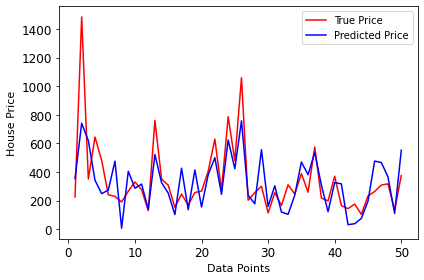

In [56]:
plot_results(PAR_predict, 50, 'PAR_Results')

### Model 3 Selection 
Multi-layer Perceptron regressor

In [45]:
from sklearn.neural_network import MLPRegressor

MLP_pipe = Pipeline([("scaler", StandardScaler()),
                       ("MLP", MLPRegressor(learning_rate="adaptive",random_state=42))])



### Model 3 Training and Hyperparameter Tuning 

In [1]:
# Creating the parameters search set
param_MLP = dict(MLP__hidden_layer_sizes = [(100,),(200,)],
                 MLP__alpha = [0.0001,0.001,0.1],
                MLP__learning_rate_init = np.linspace(0.1, 0.00001, num=20))

# initialize GirdSearch
Search_MLP = GridSearchCV(MLP_pipe, param_MLP, scoring='neg_root_mean_squared_error',
                          verbose=10, n_jobs=-2)

# train and find the best parameters
Search_MLP.fit(X_train,y_train)

# assign the best predictor with the resulted parameter search
MLP_predict = Search_MLP.best_estimator_

# checking the results of the search
Search_MLP.best_params_

NameError: name 'np' is not defined

### Candidate Model 3 Evaluation

In [52]:
results(MLP_predict, X_train, X_test, y_train, y_test )

The naive RMSE baseline is  231.7124484086676
The regression_baseline is  231.7129078038355
The model performance in training is  79.09675474024077
The model performance in testing is  80.62594303580939


Saving figure MLP_results


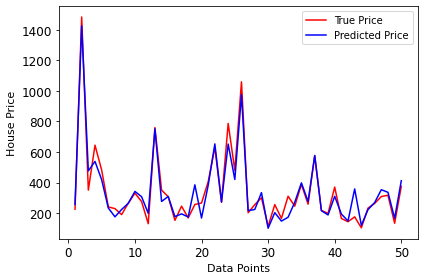

In [57]:
plot_results(MLP_predict, 50, 'MLP_results')

### Saving Best Candidate Model

In [54]:
from joblib import dump, load
#saving Multi-layer Perceptron regressor model.
dump(MLP_predict, 'Best_Candidate_Model.joblib') 

['Best_Candidate_Model.joblib']

In [60]:
# load the regressor 
best_regressor = load('Best_Candidate_Model.joblib')
# then use predict funtion to make predictions 
best_regressor.predict(X_test)

array([ 256.94548301, 1426.66352695,  476.51494148, ...,  263.52819675,
        364.54241676,  475.8887624 ])